# Example of running BioJava in a Jupyter Notebook
This notebook demonstrates how to setup the BioJava dependencies, run BioJava code using the Java Kernel, and finally use a Python cell to plot results.

### Setup BioJava dependencies
Configure class path resolver to use a local copy of jar files in the maven repository (~/.m2/repository).

In [3]:
%classpath config resolver mvnLocal

Added new repo: mvnLocal


Load the required dependencies from the local maven repository.

In [4]:
%classpath add mvn org.biojava biojava-structure 5.1.1

### Define method to calculate tri-axial ellipsoid radii for a protein chain
Three ellipse radii `a`, `b`, `c` define a tri-axial ellipsoid along the axes of inertia.

The three ellipse radii define a tri-axial ellipsoid along the

![title](../images/Ellipsoid.jpg)

Each cell must be a compilable unit, e.g., a class definition.

In [6]:
import org.biojava.nbio.structure.*;
import org.biojava.nbio.structure.geometry.*;

public class Shape {
    public static double[] getEllipsisRadii(Chain c) {
        MomentsOfInertia moi = new MomentsOfInertia();
        // use C-alpha atoms only
        for (Atom a: StructureTools.getAtomCAArray(c)) {
            moi.addPoint(a.getCoordsAsPoint3d(), 1.0);
        }
        return moi.getElipsisRadii();
    }
}

com.twosigma.beaker.javash.bkr70d3dbf8.Shape

## Calculate ellipse radii for a representative subset of PDB chains
Imports are not global, they need to be defined for each cell. However, classes defined in other cells can be accessed.

In [10]:
import java.util.*;
import java.io.*;
import org.biojava.nbio.structure.*;
import org.biojava.nbio.structure.symmetry.utils.BlastClustReader;

// store PDB chain id and ellipse radii in a csv file
String fileName = "radii.csv";
PrintWriter pw = new PrintWriter(new FileWriter(fileName));
pw.println("id,a,b,c");

// use increment to only use every n-th representative
int count = 0;
int n = 200;

// get representative PDB protein chains for 30% sequence identity clusters
BlastClustReader br = new BlastClustReader(30);

for (List<String> cluster: br.getPdbChainIdClusters()) {
    // sample every n-th representative
    if (count++ % n == 0) {
        
        // get the id for first chain in each sequence cluster
        String pdbChainId = cluster.get(0);
        System.out.print(pdbChainId + " ");
        
        // download chain
        Structure s = StructureIO.getStructure(pdbChainId);
        Chain c = s.getPolyChains().get(0);
        
        // calculate and save ellipse radii
        double[] r = Shape.getEllipsisRadii(c);
        pw.println(pdbChainId + "," + r[0] + "," + r[1] + "," + r[2]);
    }
}
pw.close();

5AZE.H 4H9U.A 1LWD.A 4JH8.A 1HX6.A 6D90.s 6DXL.A 1LXY.A 3IE1.A 3CT4.A 1IS7.A 1M5Q.A 3NXE.A 4B97.A 5J7U.A 5JR7.B 4J0K.A 4YOK.A 1SQL.A 6EU2.M 5JJU.A 1GG4.A 3F5F.A 2IML.A 1VC9.A 4HL9.A 1W4G.A 3C9G.A 1V2B.A 5GUW.A 5IT0.A 3RQZ.A 1TV8.A 2ICW.G 4EJQ.A 5XSX.A 5DIR.A 5LJY.A 2D5L.A 2WIU.B 4R3I.A 3O6U.A 2WP4.A 5G52.A 5WTI.Z 1IJX.A 4BFG.A 4LKU.A 4N0N.A 2I1J.A 5LF9.A 5JTV.A 2EQ5.A 5XDH.A 5UWB.B 4V7O.AE 4XPZ.A 2H1O.E 4II1.A 3OPY.A 5TUV.A 4J7H.A 4V62.AX 4OM3.A 4IRV.A 5K2Y.A 3WFO.A 5MRF.3 4Q4G.X 4HGK.C 4MBE.B 3HA2.A 6G90.D 4G4I.A 4C3S.A 2AFE.A 4G59.C 2KW1.A 5IET.B 1SM7.A 5YYL.C 3F1I.S 1KVN.A 5FTT.A 4UUT.A 2IXB.A 4UM8.B 5A6F.C 2Z5E.A 1DXS.A 4ZMM.A 3E18.A 5EIP.A 3TYY.A 3LAZ.A 4PH8.A 3EFY.A 1Y0J.A 5LSJ.N 2JS9.A 2BOL.A 3WEW.A 5I0Q.A 4O7J.B 4MDR.A 4WQO.A 2JYN.A 2E8P.A 5OQL.H 1WHZ.A 1DSQ.A 2FG9.A 2KXD.A 3FO8.D 1SDD.A 5JOJ.A 2XEU.A 2F6H.X 5TE9.A 2CSW.A 2M4I.A 5JNQ.A 2QNA.B 2KDU.B 2C7H.A 1QLO.A 2E44.A 1ZLG.A 1ERD.A 3TGH.A 5T7Q.A 3ZF8.A 2LIF.A 1N7D.A 3UQ3.A 3L1N.A 4V5Z.Ae 3I4U.A 2MVB.A 3W15.A 5K9H.A 3TMA.A 5UQ

null

## Plot the distribution of ellipse radii
Use a Python cell to plot the results using Matplotlib.

In [14]:
%%python
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("radii.csv")
df.head()

,id,a,b,c
0,5AZE.H,10.362348,21.969226,22.407709
1,4H9U.A,14.008238,14.993670,15.836474
2,1LWD.A,15.585820,19.230798,20.212576
3,4JH8.A,10.566548,14.841371,15.161407
4,1HX6.A,15.293704,17.555811,20.192787


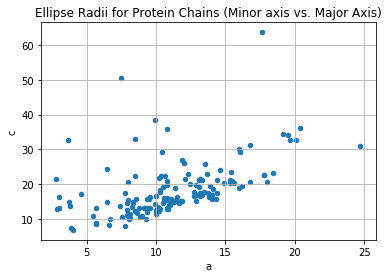

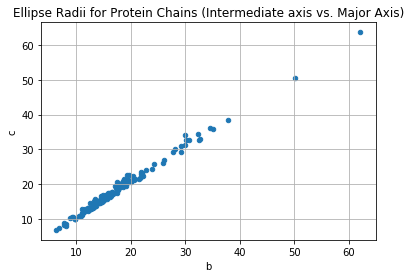

In [13]:
%%python
df.plot.scatter(x="a",y="c",grid=True,title="Ellipse Radii for Protein Chains (Minor axis vs. Major Axis)")
df.plot.scatter(x="b",y="c",grid=True,title="Ellipse Radii for Protein Chains (Intermediate axis vs. Major Axis)");